# Shifted Grid Tests

## 3 Runs:
  - normal (Fortran)
  - shifted (everything else standard)
  - full improved (shifted, Richardson-Fermions, Coeffs-Bosons, γ-tail improve)

## Open Problems

  - <del>First and last 2 frequencies for computation 3 are bad (reason?)</del>
      - <del>use old ν range sP.n_iν-sP.shift*(trunc(Int,sP.n_iω/2) )) ?</del>
      - cause: ω(ν) summation (skewed grid needs ν dependent ω summation)
  - <del>Σ_ladderLoc does not match Σ_DMFT for computation 2 and 3</del>
      - <del>γ .- γ2 could be a reason </del>
      - cause: wrong index conversion between Matsubara and base one
  - No coeffs for EoM

In [8]:
ENV["GKS_ENCODING"] = "utf-8"
using Plots
using LadderDGA
using Logging
using LaTeXStrings

io = stdout#devnull#stdout
metafmt(level::Logging.LogLevel, _module, group, id, file, line) = Logging.default_metafmt(level, nothing, group, id, nothing, nothing)
logger = ConsoleLogger(io, Logging.Info, meta_formatter=metafmt, show_limited=true, right_justify=0)
global_logger(logger);

In [10]:
cfg_file = "/home/julian/Hamburg/lDGA_shift_tests/cutoff_tests/conf_20_40_s0.toml";
cfg_file2 = "/home/julian/Hamburg/lDGA_shift_tests/cutoff_tests/conf_40_40_s0.toml";
cfg_file3 = "/home/julian/Hamburg/lDGA_shift_tests/cutoff_tests/conf_20_40_s1.toml";
cfg_file4 = "/home/julian/Hamburg/lDGA_shift_tests/cutoff_tests/conf_40_40_s1.toml";
labels = ["20_40_s0", "40_40_s0", "20_40_s1", "40_40_s1"]

mP, sP, env, kGrids, qGridLoc, freqList = readConfig(cfg_file)
kG = kGrids[1]
νGrid, sumHelper_f, impQ_sp, impQ_ch, GImp, GLoc, GLoc_fft, Σ_loc, FUpDo  = setup_LDGA(kG, freqList, mP, sP, env);

mP2, sP2, env2, kGrids2, qGridLoc2, freqList2 = readConfig(cfg_file2)
kG2 = kGrids2[1]
νGrid2, sumHelper_f2, impQ_sp2, impQ_ch2, GImp2, GLoc2, GLoc_fft2, Σ_loc2, FUpDo2 = setup_LDGA(kG2, freqList2, mP2, sP2, env2);

mP3, sP3, env3, kGrids3, qGridLoc3, freqList3 = readConfig(cfg_file3)
kG3 = kGrids3[1]
νGrid3, sumHelper_f3, impQ_sp3, impQ_ch3, GImp3, GLoc3, GLoc_fft3, Σ_loc3, FUpDo3 = setup_LDGA(kG3, freqList3, mP3, sP3, env3);

mP4, sP4, env4, kGrids4, qGridLoc4, freqList4 = readConfig(cfg_file4)
kG4 = kGrids4[1]
νGrid4, sumHelper_f4, impQ_sp4, impQ_ch4, GImp4, GLoc4, GLoc_fft4, Σ_loc4, FUpDo4 = setup_LDGA(kG4, freqList4, mP4, sP4, env4);

[ Info: Reading Inputs...
[ Info: setting usable ranges of sp and ch channel from 3:39 and 3:39 to the same range of 3:39
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(3:39) = 0.2829, χLoc_ch(3:39) = 0.1901 
└ sum χupup check (fit, tail sub, tail sub + fit, expected): 0.23651015542304954 ?≈? 0.250080313587604 ?=? 0.2493255412727938 ?≈? 0.25"
[ Info: Reading Inputs...
[ Info: setting usable ranges of sp and ch channel from 16:66 and 16:66 to the same range of 16:66
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(16:66) = 0.2796, χLoc_ch(16:66) = 0.1857 
└ sum χupup check (fit, tail sub, tail sub + fit, expected): 0.23266172761908727 ?≈? 0.24905563969265473 ?=? 0.24417914449224298 ?≈? 0.25"
[ Info: Reading Inputs...
[ Info: setting usable ranges of sp and ch channel from 3:39 and 3:39 to the same range of 3:39
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:

In [11]:
calc_Σ_dbg = LadderDGA.calc_Σ_dbg
# "local" correction quantities
bubbleLoc = calc_bubble(νGrid, GImp, qGridLoc, mP, sP);
locQ_sp = calc_χ_trilex(impQ_sp.Γ, bubbleLoc, qGridLoc, νGrid, sumHelper_f, mP.U, mP, sP);
locQ_ch = calc_χ_trilex(impQ_ch.Γ, bubbleLoc, qGridLoc, νGrid, sumHelper_f, -mP.U, mP, sP);
Σ_ladderLoc,Σ_ladderLoc_ω,tmp_loc = calc_Σ_dbg(locQ_sp, locQ_ch, bubbleLoc, GImp, FUpDo,
                     qGridLoc, sumHelper_f, mP, sP)
Σ_ladderLoc = Σ_ladderLoc .+ mP.n * mP.U/2.0;

bubbleLoc2 = calc_bubble(νGrid2, GImp2, qGridLoc2, mP2, sP2);
locQ_sp2 = calc_χ_trilex(impQ_sp2.Γ, bubbleLoc2, qGridLoc, νGrid2, sumHelper_f2, mP2.U, mP2, sP2);
locQ_ch2 = calc_χ_trilex(impQ_ch2.Γ, bubbleLoc2, qGridLoc, νGrid2, sumHelper_f2, -mP2.U, mP2, sP2);
Σ_ladderLoc2,Σ_ladderLoc_ω2,tmp_loc2 = calc_Σ_dbg(locQ_sp2, locQ_ch2, bubbleLoc2, GImp2, FUpDo2,
                     qGridLoc, sumHelper_f2, mP2, sP2)
Σ_ladderLoc2 = Σ_ladderLoc2 .+ mP2.n * mP2.U/2.0;

bubbleLoc3 = calc_bubble(νGrid3, GImp3, qGridLoc3, mP3, sP3);
locQ_sp3 = calc_χ_trilex(impQ_sp3.Γ, bubbleLoc3, qGridLoc3, νGrid3, sumHelper_f3, mP3.U, mP3, sP3);
locQ_ch3 = calc_χ_trilex(impQ_ch3.Γ, bubbleLoc3, qGridLoc3, νGrid3, sumHelper_f3, -mP3.U, mP3, sP3);
Σ_ladderLoc3,Σ_ladderLoc_ω3,tmp_loc3 = calc_Σ_dbg(locQ_sp3, locQ_ch3, bubbleLoc3, GImp3, FUpDo3,
                     qGridLoc3, sumHelper_f3, mP3, sP3)
Σ_ladderLoc3 = Σ_ladderLoc3 .+ mP3.n * mP3.U/2.0;

bubbleLoc4 = calc_bubble(νGrid4, GImp4, qGridLoc4, mP4, sP4);
locQ_sp4 = calc_χ_trilex(impQ_sp4.Γ, bubbleLoc4, qGridLoc4, νGrid4, sumHelper_f4,  mP4.U, mP4, sP4);
locQ_ch4 = calc_χ_trilex(impQ_ch4.Γ, bubbleLoc4, qGridLoc4, νGrid4, sumHelper_f4, -mP4.U, mP4, sP4);
Σ_ladderLoc4,Σ_ladderLoc_ω4, tmp_loc4 = calc_Σ_dbg(locQ_sp4, locQ_ch4, bubbleLoc4, GImp4, FUpDo4,
          qGridLoc4, sumHelper_f4, mP4, sP4)
Σ_ladderLoc4 = Σ_ladderLoc4 .+ mP4.n * mP4.U/2.0;

In [12]:
Σ_ladderLoc_check = calc_Σ(locQ_sp, locQ_ch, bubbleLoc, GImp, FUpDo,
                     qGridLoc, sumHelper_f, mP, sP) .+ mP.n * mP.U/2.0;

Σ_ladderLoc_check2 = calc_Σ(locQ_sp2, locQ_ch2, bubbleLoc2, GImp2, FUpDo2,
                     qGridLoc, sumHelper_f2, mP2, sP2) .+ mP2.n * mP2.U/2.0;

Σ_ladderLoc_check3 = calc_Σ(locQ_sp3, locQ_ch3, bubbleLoc3, GImp3, FUpDo3,
                     qGridLoc3, sumHelper_f3, mP3, sP3) .+ mP3.n .* mP3.U/2.0;

Σ_ladderLoc_check4 = calc_Σ(locQ_sp4, locQ_ch4, bubbleLoc4, GImp4, FUpDo4,
                     qGridLoc4, sumHelper_f4, mP4, sP4) .+ mP4.n .* mP4.U/2.0;

[ Warning: TODO: inefficient EoM calculation
[ Warning: TODO: inefficient EoM calculation
[ Warning: TODO: inefficient EoM calculation
[ Warning: TODO: inefficient EoM calculation


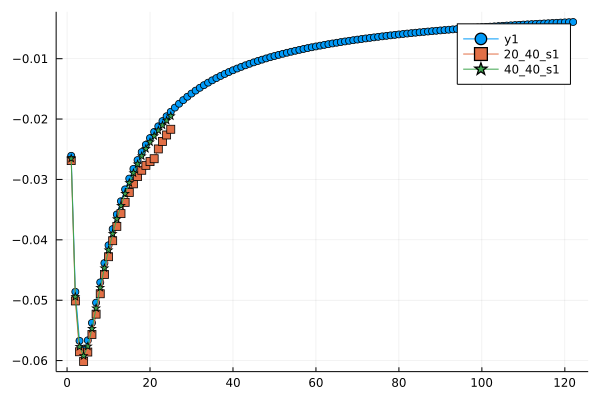

In [19]:
plot(imag(Σ_loc), markershape=:auto)
#plot!(imag(Σ_ladderLoc[sP.n_iν+1:end-15]), markershape=:auto, label=labels[1])
#plot!(imag(Σ_ladderLoc2[sP2.n_iν+1:end-15]), markershape=:auto, label=labels[2])
plot!(imag(Σ_ladderLoc3[sP3.n_iν+1:end-15]), markershape=:auto, label=labels[3])
plot!(imag(Σ_ladderLoc4[sP4.n_iν+1:end-15]), markershape=:auto, label=labels[4])

In [37]:
# non local quantities 
bubble = calc_bubble(νGrid, GLoc_fft, kG, mP, sP);
nlQ_sp = calc_χ_trilex(impQ_sp.Γ, bubble, kG, νGrid, sumHelper_f,  mP.U, mP, sP);
nlQ_ch = calc_χ_trilex(impQ_ch.Γ, bubble, kG, νGrid, sumHelper_f, -mP.U, mP, sP);

nlQ_sp_nλ = deepcopy(nlQ_sp)
nlQ_ch_nλ = deepcopy(nlQ_ch)
λ_sp, λ_spch  = λ_correction!(impQ_sp, impQ_ch, FUpDo, Σ_loc, Σ_ladderLoc, nlQ_sp, nlQ_ch, bubble, GLoc_fft, kG, mP, sP)

# non local quantities 
bubble2 = calc_bubble(νGrid2, GLoc_fft2, kG, mP2, sP2);
nlQ_sp2 = calc_χ_trilex(impQ_sp2.Γ, bubble2, kG, νGrid2, sumHelper_f2,  mP2.U, mP2, sP2);
nlQ_ch2 = calc_χ_trilex(impQ_ch2.Γ, bubble2, kG, νGrid2, sumHelper_f2, -mP2.U, mP2, sP2);

nlQ_sp2_nλ = deepcopy(nlQ_sp2)
nlQ_ch2_nλ = deepcopy(nlQ_ch2)
λ_sp2, λ_spch2  = λ_correction!(impQ_sp2, impQ_ch2, FUpDo2, Σ_loc2, Σ_ladderLoc2, nlQ_sp2, nlQ_ch2, bubble2, GLoc_fft2, kG, mP2, sP2)

# non local quantities 
bubble3 = calc_bubble(νGrid3, GLoc_fft3, kG3, mP3, sP3);
nlQ_sp3 = calc_χ_trilex(impQ_sp3.Γ, bubble3, kG3, νGrid3, sumHelper_f3,  mP3.U, mP3, sP3);
nlQ_ch3 = calc_χ_trilex(impQ_ch3.Γ, bubble3, kG3, νGrid3, sumHelper_f3, -mP3.U, mP3, sP3);

nlQ_sp3_nλ = deepcopy(nlQ_sp3)
nlQ_ch3_nλ = deepcopy(nlQ_ch3)
λ_sp3, λ_spch3  = λ_correction!(impQ_sp3, impQ_ch3, FUpDo3, Σ_loc3, Σ_ladderLoc3, nlQ_sp3, nlQ_ch3, bubble3, GLoc_fft3, kG3, mP3, sP3)


# non local quantities 
bubble4 = calc_bubble(νGrid4, GLoc_fft4, kG4, mP4, sP4);
nlQ_sp4 = calc_χ_trilex(impQ_sp4.Γ, bubble4, kG4, νGrid4, sumHelper_f4,  mP4.U, mP4, sP4);
nlQ_ch4 = calc_χ_trilex(impQ_ch4.Γ, bubble4, kG4, νGrid4, sumHelper_f4, -mP4.U, mP4, sP4);

nlQ_sp4_nλ = deepcopy(nlQ_sp4)
nlQ_ch4_nλ = deepcopy(nlQ_ch4)
λ_sp4, λ_spch4  = λ_correction!(impQ_sp4, impQ_ch4, FUpDo4, Σ_loc4, Σ_ladderLoc4, nlQ_sp4, nlQ_ch4, bubble4, GLoc_fft4, kG4, mP4, sP4)

┌ Info: Computing λsp corrected χsp, using 
│   sP.χFillType = lambda_χ_fill::ChiFillType = 1
└    as fill value outside usable ω range. = " as fill value outside usable ω range."
[ Warning: currently using min(usable_sp, usable_ch) = min(10:32,10:32) = 10:32 for all calculations. relax this?
┌ Info: Found usable intervals for non-local susceptibility of length 
│ sp: 10:32, length: 23
│ ch: 10:32, length: 23
│ usable: 10:32, length: 23
└ χch sum = 0.1328016710612734, rhs = 0.22874999551918992
┌ Info: found 
│   χ_min = -0.23623728415022102
└   ". Looking for roots in intervall $(int)" = ". Looking for roots in intervall [-0.23623728415022102, 4.7247456830044205]"
┌ Info: Found λsp 
└   λsp = 0.2998386243403825
[ Info: new lambda correction: λsp=0.0 and λch=0.0
┌ Info: Computing λsp corrected χsp, using 
│   sP.χFillType = lambda_χ_fill::ChiFillType = 1
└    as fill value outside usable ω range. = " as fill value outside usable ω range."
[ Warning: currently using min(usable_sp, usable

(-0.1749018117181667, [0.0, 0.0])

# Investigation of general differences
Before going through all terms individually, we try to get an overview of the differences between normal and shifted grids

In [7]:
using Printf
ωindices = (sP.dbg_full_eom_omega || sP.ωsum_type == :full) ? (1:size(bubbleLoc,1)) : intersect(locQ_sp.usable_ω, locQ_ch.usable_ω)
ωindices2 = (sP2.dbg_full_eom_omega || sP2.ωsum_type == :full) ? (1:size(bubbleLoc2,1)) : intersect(locQ_sp2.usable_ω, locQ_ch2.usable_ω)
U = mP.U
OneToIndex_to_Freq = LadderDGA.OneToIndex_to_Freq
χsp = locQ_sp.χ
χch = locQ_ch.χ
γsp = locQ_sp.γ
γch = locQ_ch.γ
χsp2 = locQ_sp2.χ
χch2 = locQ_ch2.χ
γsp2 = locQ_sp2.γ
γch2 = locQ_ch2.γ
shift2 = 1
ωZero2 = sP2.n_iω
νZero2 = sP2.n_iν
kGrid2 = qGridLoc
Gνω = GImp
Gνω2 = GImp2
kGrid = qGridLoc
νiRange = 21:30
Σw = Array{Complex{Float64}}(undef, length(ωindices), 1, size(bubble,3))
Σw2 = Array{Complex{Float64}}(undef, length(ωindices2), 1, size(bubble2,3))
errors = Array{Complex{Float64},3}(undef, length(νiRange), length(ωindices), 6)

println("  ν     ω     Δγsp       Δχsp       Δγch       Δχch       Δtmp        Δr")
println("---------------------------------------------------------------------------- ")
for (νii,νi) in enumerate(νiRange)
    for ωi in 1:length(ωindices)
        ωₙ = ωindices[ωi]
        fsp = 1.5 .* (1 .+ U*χsp[ωₙ, :])
        fch = 0.5 .* (1 .- U*χch[ωₙ, :])
        νZerop = 0 #νZero + shift*(trunc(Int64,(ωₙ - ωZero)/2))

        fsp2 = 1.5 .* (1 .+ U*χsp2[ωₙ, :])
        fch2 = 0.5 .* (1 .- U*χch2[ωₙ, :])
        νZerop2 = 0 #νZero2 + shift2*(trunc(Int64,(ωₙ - ωZero2 - 1)/2))
        #println("wn=$(ωₙ) - $(ωZero2) => $(trunc(Int64,(ωₙ - ωZero2 - 1)/2))")
        ωn, νn = OneToIndex_to_Freq(ωi, νi, sP)
        #println("$(ωi), $(νi), $(νZerop2+νi), $(tmp_loc2[ωi,:,νZerop2+νi])")
        Kνωq = γsp[ωₙ, :, νZerop+νi]    .* fsp  .- γch[ωₙ, :, νZerop+νi]   .* fch .- 1.5 .+ 0.5 .+  tmp_loc[ωi,:, νZerop+νi]
        Σw[ωi,:, νi]  = LadderDGA.conv_fft1(kGrid, Kνωq , view(Gνω , νn + ωn,:))
        
        Kνωq2 = γsp2[ωₙ, :, νZerop2+νi] .* fsp2 .- γch2[ωₙ, :, νZerop2+νi] .* fch2 .-1.5 .+ 0.5 .+ tmp_loc2[ωi,:,νZerop2+νi]
        Σw2[ωi,:, νi] = LadderDGA.conv_fft1(kGrid, Kνωq2, view(Gνω2, νn + ωn,:))
        errors[νii, ωi, : ] = [γsp[ωₙ, 1, νZerop+νi] .- γsp2[ωₙ, 1, νZerop2+νi]
                          χsp[ωₙ, 1] - χsp2[ωₙ, 1]
                          γch[ωₙ, 1, νZerop+νi]  .- γch2[ωₙ, 1, νZerop2+νi]
                          χch[ωₙ, 1] .- χch2[ωₙ, 1]
                          tmp_loc[ωi,1, νZerop+νi] .- tmp_loc2[ωi,1, νZerop+νi]
                          (γsp[ωₙ, :, νZerop+νi] .* fsp .- γch[ωₙ, :, νZerop+νi] .* fch) .- (γsp2[ωₙ, :, νZerop2+νi] .* fsp2 .- γch2[ωₙ, :, νZerop2+νi] .* fch2)]
        out = real.(errors[νii, ωi, : ])
        #@printf "%3d   %3d   %8.5f   %8.5f   %8.5f   %8.5f   %8.5f   %8.5f\n" νn ωn out[1] out[2] out[3] out[4] out[5] out[6]
    end
end

  ν     ω     Δγsp       Δχsp       Δγch       Δχch       Δtmp        Δr
---------------------------------------------------------------------------- 


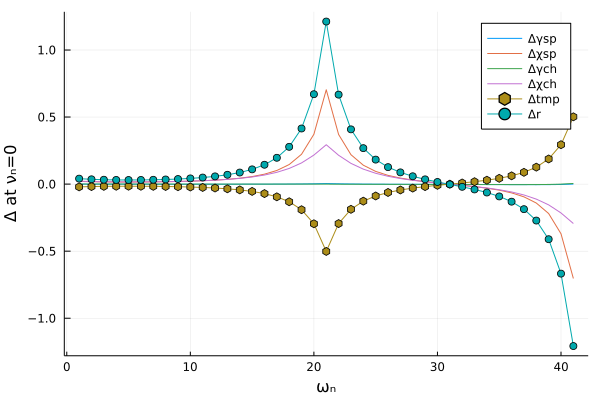

In [8]:
νi = 1
plot(real.(errors[νi,:,1]), label="Δγsp", xlabel="ωₙ", ylabel="Δ at νₙ=0")
plot!(real.(errors[νi,:,2]), label="Δχsp")
plot!(real.(errors[νi,:,3]), label="Δγch")
plot!(real.(errors[νi,:,4]), label="Δχch")
plot!(real.(errors[νi,:,5]), label="Δtmp", markershape=:hexagon)
plot!(real.(errors[νi,:,6]), label="Δr", markershape=:circle)

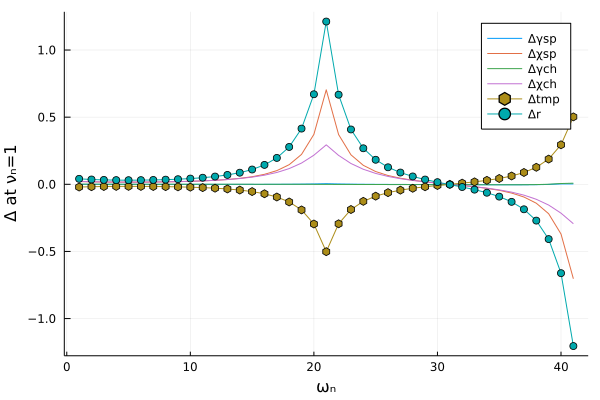

In [9]:
νi = 2
plot(real.(errors[νi,:,1]), label="Δγsp", xlabel="ωₙ", ylabel="Δ at νₙ=1")
plot!(real.(errors[νi,:,2]), label="Δχsp")
plot!(real.(errors[νi,:,3]), label="Δγch")
plot!(real.(errors[νi,:,4]), label="Δχch")
plot!(real.(errors[νi,:,5]), label="Δtmp", markershape=:hexagon)
plot!(real.(errors[νi,:,6]), label="Δr", markershape=:circle)

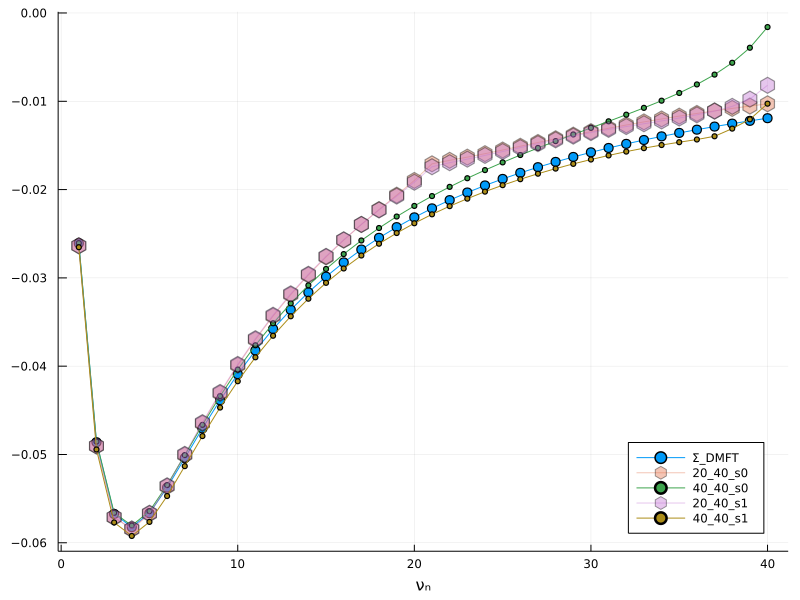

In [31]:
xarri = -20:19
xarr2 = (2 .* xarri .+ 3) .* π ./mP.β
usable_ω3 = intersect(locQ_sp3.usable_ω, locQ_ch3.usable_ω)
#(2 .* (1:20) .+ 1) .* π ./mP.β
plot(imag(Σ_loc3[1:40]), xlabel="νₙ", markershape=:circle, markersize=5, label="Σ_DMFT",size=(800,600),legend=:bottomright)
#plot!(imag(Σ_ladderLoc[sP.n_iν+1:end,1]), markershape=:circle, markersize=3, label="Σ_ladderLoc")
plot!(imag(Σ_ladderLoc[sP.n_iν+1:end,1]), markershape=:hexagon, markersize=8, alpha=0.4, label=labels[1])
plot!(imag(Σ_ladderLoc2[sP2.n_iν+1:end,1]), markershape=:circle, markersize=3, label=labels[2])
plot!(imag(Σ_ladderLoc3[sP3.n_iν+1:end,1]), markershape=:hexagon, markersize=8, alpha=0.4, label=labels[3])
plot!(imag(Σ_ladderLoc4[sP4.n_iν+1:end,1]), markershape=:circle, markersize=3, label=labels[4])

# tmp(ω,q=0,ν!=0) Investigation

$\Sigma(\nu_{n>0})$ shows a large difference between normal and shifted grids. Possible cause is a bug in $tmp(\omega,q,\nu)$

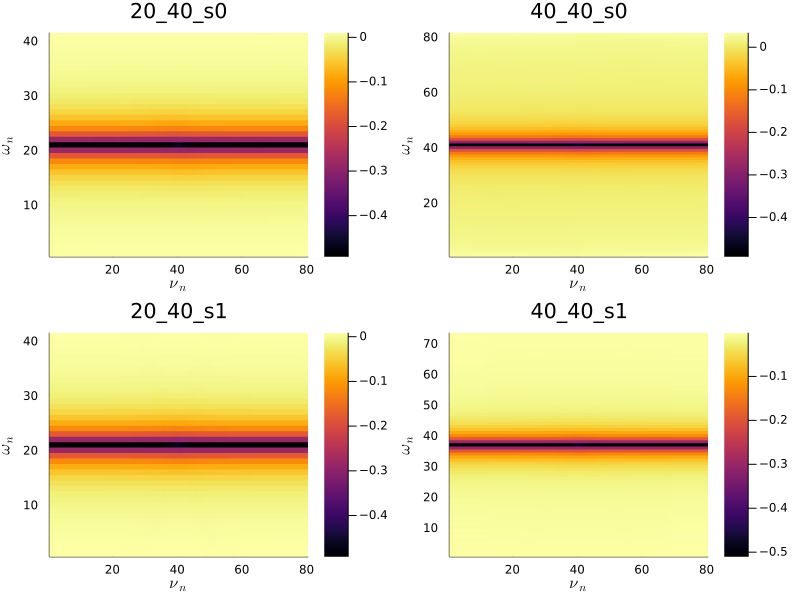

In [11]:
t = [-sP.n_iν:sP.n_iν-1,-sP.n_iω:sP.n_iω]
hms = [heatmap(real(tmp_loc[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=labels[1])
    heatmap(real(tmp_loc2[:,1,:]),ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[2])
heatmap(real(tmp_loc3[:,1,:]),ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[3])
heatmap(real(tmp_loc4[:,1,:]),ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[4])]
plot(hms..., layout=(2,2), size=(800,600))

# γ(ω,q=0,ν!=0) Investigation

$\Sigma(\nu_{n>0})$ shows a large difference between normal and shifted grids. Possible cause is a bug in $\gamma(\omega,q,\nu)$

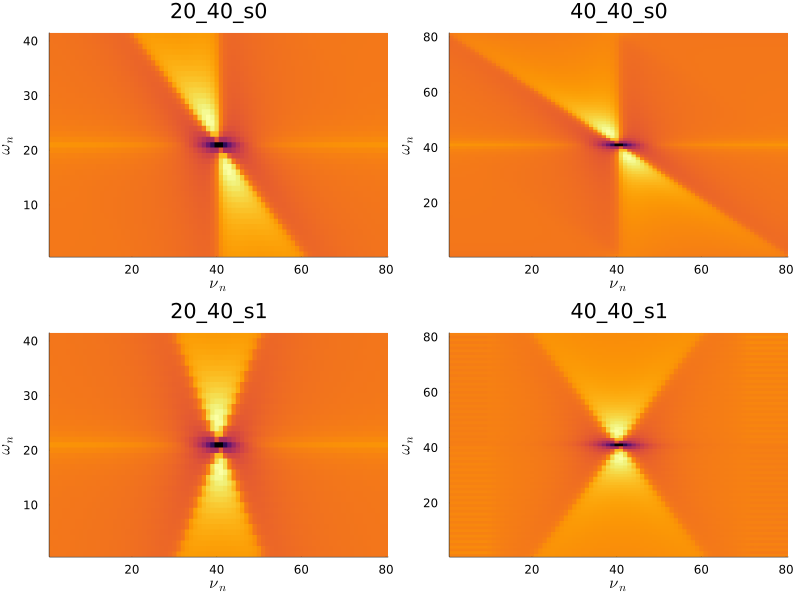

In [12]:

hms = [heatmap(real(locQ_sp.γ[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[1])
heatmap(real(locQ_sp2.γ[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[2])
heatmap(real(locQ_sp3.γ[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[3])
heatmap(real(locQ_sp4.γ[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n", title=labels[4])
]

plot(hms..., layout = (2,2), colorbar = false, size=(800,600))

# Σ_ladderLoc_ω Investigation

compute full EoM for local case directly as

$\Sigma^\text{direct}(\nu) = \frac{U n}{2} - \frac{U}{\beta^2} \sum_{\nu'\omega} F^{\nu\nu'\omega}_{\uparrow\downarrow}G_\text{Imp}(\nu')G_\text{Imp}(\nu'+\omega)G_\text{Imp}(\nu+\omega)$

AND

$\Sigma^\text{direct,bubble}(\nu) = \frac{U n}{2} - \frac{U}{\beta^2} \sum_{\nu'\omega} F^{\nu\nu'\omega}_{\uparrow\downarrow}(-\frac{\chi_0(\omega,\nu')}{\beta}) G_\text{Imp}(\nu+\omega)$

`Σ_direct3` and `Σ_direct4` are computed using the same code as in the `LadderDGA.jl` code.

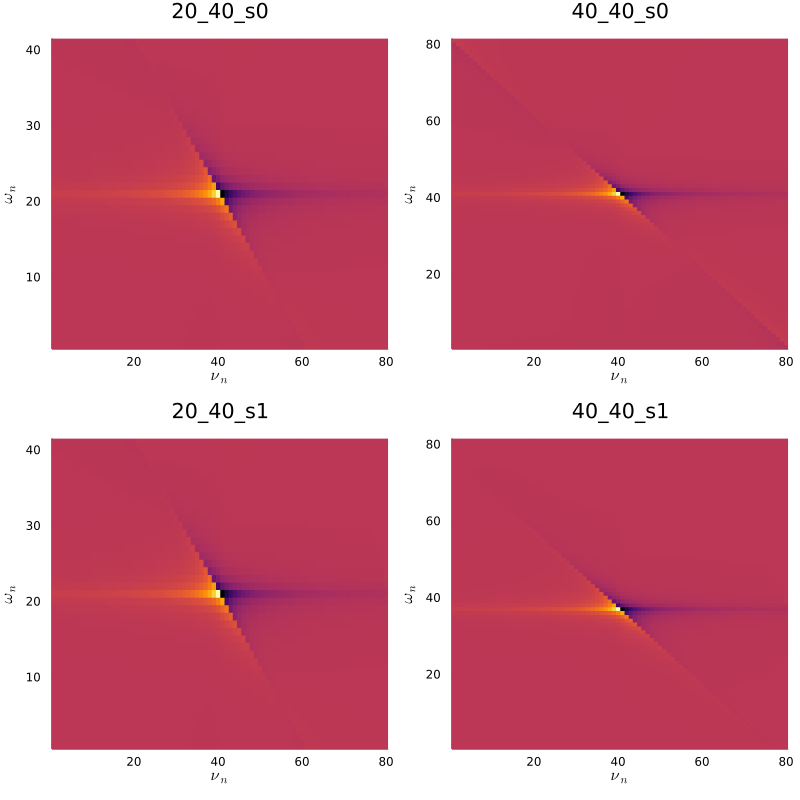

In [13]:

hms = [heatmap(imag(Σ_ladderLoc_ω[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=labels[1])
 heatmap(imag(Σ_ladderLoc_ω2[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=labels[2])
 heatmap(imag(Σ_ladderLoc_ω3[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=labels[3])
 heatmap(imag(Σ_ladderLoc_ω4[:,1,:]), ylabel=L"\omega_n", xlabel=L"\nu_n",title=labels[4])
]
plot(hms..., layout = (2,2), colorbar = false, size=(800,800))

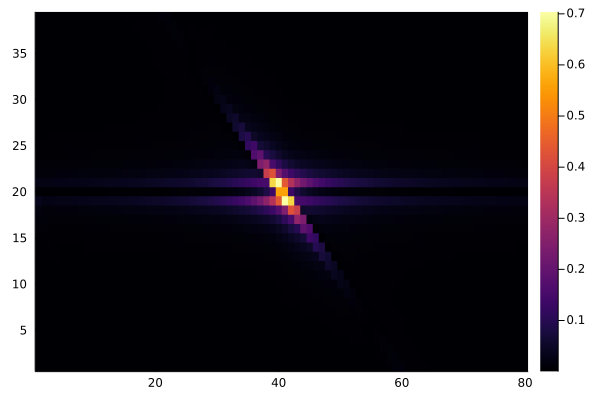

In [14]:
heatmap(abs.(Σ_ladderLoc_ω[3:end,1,:] .- Σ_ladderLoc_ω3[1:end-2,1,:]))

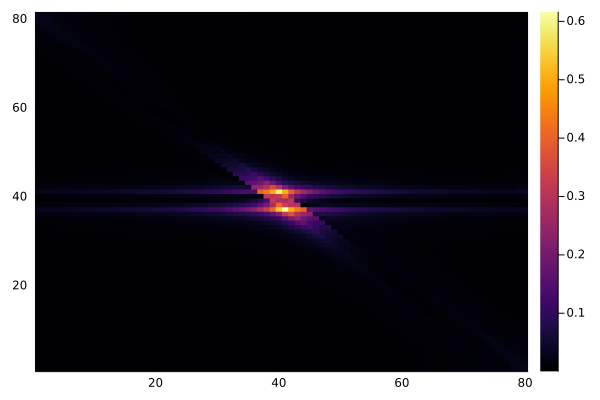

In [15]:
heatmap(abs.(Σ_ladderLoc_ω2[:,1,:] .- Σ_ladderLoc_ω4[:,1,:]))

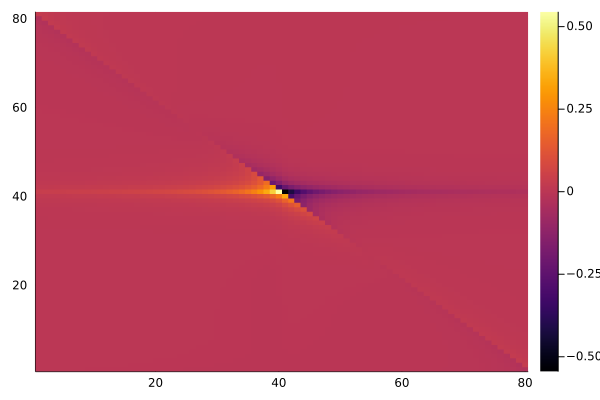

In [16]:
heatmap(imag(Σ_ladderLoc_ω2[:,1,:]))

In [17]:
ωindices = intersect(nlQ_sp3.usable_ω, nlQ_ch3.usable_ω)
for ωii in 1:length(ωindices)
ωi = ωindices[ωii]
for (i,νi) in enumerate(1:size(nlQ_sp3.γ,3))
    ωn, νn = OneToIndex_to_Freq(ωi, νi, sP3)
    is = i - sP3.shift*trunc(Int,ωn/2)
    println("$ωn, $νn, $is, $(is > 0 && is <= size(Σ_ladderLoc_ω3,1))")
end
end

-11, -35, 6, true
-11, -34, 7, true
-11, -33, 8, true
-11, -32, 9, true
-11, -31, 10, true
-11, -30, 11, true
-11, -29, 12, true
-11, -28, 13, true
-11, -27, 14, true
-11, -26, 15, true
-11, -25, 16, true
-11, -24, 17, true
-11, -23, 18, true
-11, -22, 19, true
-11, -21, 20, true
-11, -20, 21, true
-11, -19, 22, true
-11, -18, 23, true
-11, -17, 24, true
-11, -16, 25, true
-11, -15, 26, true
-11, -14, 27, true
-11, -13, 28, true
-11, -12, 29, true
-11, -11, 30, true
-11, -10, 31, true
-11, -9, 32, true
-11, -8, 33, true
-11, -7, 34, true
-11, -6, 35, true
-11, -5, 36, true
-11, -4, 37, true
-11, -3, 38, true
-11, -2, 39, true
-11, -1, 40, true
-11, 0, 41, true
-11, 1, 42, false
-11, 2, 43, false
-11, 3, 44, false
-11, 4, 45, false
-11, 5, 46, false
-11, 6, 47, false
-11, 7, 48, false
-11, 8, 49, false
-11, 9, 50, false
-11, 10, 51, false
-11, 11, 52, false
-11, 12, 53, false
-11, 13, 54, false
-11, 14, 55, false
-11, 15, 56, false
-11, 16, 57, false
-11, 17, 58, false
-11, 18, 59, fals

-4, -27, 14, true
-4, -26, 15, true
-4, -25, 16, true
-4, -24, 17, true
-4, -23, 18, true
-4, -22, 19, true
-4, -21, 20, true
-4, -20, 21, true
-4, -19, 22, true
-4, -18, 23, true
-4, -17, 24, true
-4, -16, 25, true
-4, -15, 26, true
-4, -14, 27, true
-4, -13, 28, true
-4, -12, 29, true
-4, -11, 30, true
-4, -10, 31, true
-4, -9, 32, true
-4, -8, 33, true
-4, -7, 34, true
-4, -6, 35, true
-4, -5, 36, true
-4, -4, 37, true
-4, -3, 38, true
-4, -2, 39, true
-4, -1, 40, true
-4, 0, 41, true
-4, 1, 42, false
-4, 2, 43, false
-4, 3, 44, false
-4, 4, 45, false
-4, 5, 46, false
-4, 6, 47, false
-4, 7, 48, false
-4, 8, 49, false
-4, 9, 50, false
-4, 10, 51, false
-4, 11, 52, false
-4, 12, 53, false
-4, 13, 54, false
-4, 14, 55, false
-4, 15, 56, false
-4, 16, 57, false
-4, 17, 58, false
-4, 18, 59, false
-4, 19, 60, false
-4, 20, 61, false
-4, 21, 62, false
-4, 22, 63, false
-4, 23, 64, false
-4, 24, 65, false
-4, 25, 66, false
-4, 26, 67, false
-4, 27, 68, false
-4, 28, 69, false
-4, 29, 70, 

3, 7, 48, false
3, 8, 49, false
3, 9, 50, false
3, 10, 51, false
3, 11, 52, false
3, 12, 53, false
3, 13, 54, false
3, 14, 55, false
3, 15, 56, false
3, 16, 57, false
3, 17, 58, false
3, 18, 59, false
3, 19, 60, false
3, 20, 61, false
3, 21, 62, false
3, 22, 63, false
3, 23, 64, false
3, 24, 65, false
3, 25, 66, false
3, 26, 67, false
3, 27, 68, false
3, 28, 69, false
3, 29, 70, false
3, 30, 71, false
3, 31, 72, false
3, 32, 73, false
3, 33, 74, false
3, 34, 75, false
3, 35, 76, false
3, 36, 77, false
3, 37, 78, false
3, 38, 79, false
4, -42, -1, false
4, -41, 0, false
4, -40, 1, true
4, -39, 2, true
4, -38, 3, true
4, -37, 4, true
4, -36, 5, true
4, -35, 6, true
4, -34, 7, true
4, -33, 8, true
4, -32, 9, true
4, -31, 10, true
4, -30, 11, true
4, -29, 12, true
4, -28, 13, true
4, -27, 14, true
4, -26, 15, true
4, -25, 16, true
4, -24, 17, true
4, -23, 18, true
4, -22, 19, true
4, -21, 20, true
4, -20, 21, true
4, -19, 22, true
4, -18, 23, true
4, -17, 24, true
4, -16, 25, true
4, -15, 

# nonlocal χ comparisons

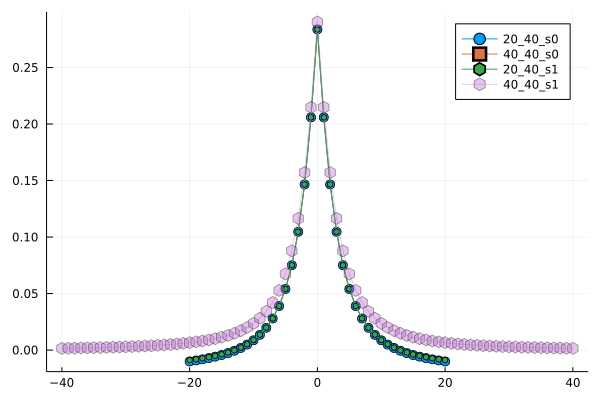

In [18]:
plot(-sP.n_iω:sP.n_iω, real(locQ_ch.χ),markershape=:circle,  markersize=5, label=labels[1])
plot!((-sP2.n_iω:sP2.n_iω)[locQ_ch2.usable_ω], real(locQ_ch2.χ[locQ_ch2.usable_ω]),markershape=:square,  markersize=2, label=labels[2])
plot!(-sP3.n_iω:sP3.n_iω, real(locQ_ch3.χ),markershape=:hexagon,markersize=3, label=labels[3])
plot!(-sP4.n_iω:sP4.n_iω, real(locQ_ch4.χ),markershape=:hexagon,markersize=6, alpha=0.4, label=labels[4])

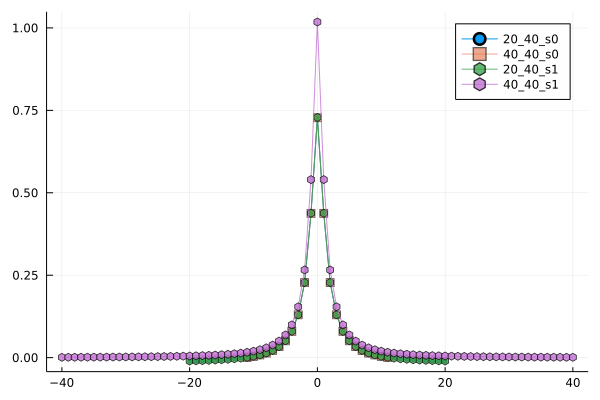

In [19]:
plot(-sP.n_iω:sP.n_iω, real(LadderDGA.kintegrate(kG, nlQ_sp.χ, dim=2)[:,1]),markershape=:circle, markersize=2, label=labels[1])
plot!((-sP2.n_iω:sP2.n_iω)[nlQ_sp2.usable_ω], real(LadderDGA.kintegrate(kG, nlQ_sp2.χ, dim=2)[nlQ_sp2.usable_ω,1]),markershape=:square, alpha=0.6, label=labels[2])
plot!(-sP3.n_iω:sP3.n_iω, real(LadderDGA.kintegrate(kG, nlQ_sp3.χ, dim=2)[:,1]),markershape=:hexagon,markersize=4, alpha=0.8, label=labels[3])
plot!(-sP4.n_iω:sP4.n_iω, real(LadderDGA.kintegrate(kG, nlQ_sp4.χ, dim=2)[:,1]),markershape=:hexagon,markersize=4, alpha=0.8, label=labels[4])